__군집 분석__은 데이터셋의 관측값이 갖고 있는 여러 속성을 분석하여 서로 비슷한 특징을 갖는 관측값끼리 같은 클러스터로 묶는 알고리즘이다. 다른 클러스터 간에는 서로 완전하게 구분되는 특징을 갖기 때문에 어느 클러스터에도 속하지 못하는 관측값이 존재할 수 있다. 이런 특성을 이용하여 특이 데이터를 찾는데 활용하기도 한다.  

한편 __군집 분석__은 비지도학습 유형이다. 관측값을 몇 개의 집단으로 나눈다는 점에서 분류 알고리즘과 비슷하지만 군집 분석은 정답이 없는 상태에서 데이터 자체의 유사성만을 기준으로 판단하는 점에서 정답을 알고 있는 상태에서 학습 과정을 거치는 분류 알고리즘과 차이가 있다. 

## 4-1 K -Means

K-means 알고리즘은 데이터 간의 유사성을 측정하는 기준으로 각 클러스터의 중심까지의 거리를 이용한다. 벡터 공간에 위치한 어떤 데이터에 대하여 k개의 클러스터가 주어졌을 때, 클러스터의 중심까지 거리가 가장 가까운 클러스터로 해당 데이터를 할당한다. 다른 클러스터 간에는 서로 완전하게 구분하기 위하여 일정한 거리 이상 떨어져야 한다. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)

display(df.head())
print()

print(df.info())
print()

print(df.describe())

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000   

In [5]:
X = df.copy()
display(X[:5])
print()

from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)

print(X[:5])

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185



[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


In [9]:
from sklearn import cluster

kmeans = cluster.KMeans(init = 'k-means++', n_clusters=5, n_init=10)

kmeans.fit(X)

cluster_label = kmeans.labels_
print(cluster_label)
print()

df['Cluster'] = cluster_label
display(df.head())

[1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 0 0 1 1 1 1 1 4 1 1 0 0 1 1 0 0 4 1 0 0 1 4 1 1 0 4 0 1 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 1 0 1 4 4 0 0 0 0 0 4 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 3 0
 0 0 0 1 1 0 0 0 1 0 0 2 1 2 2 1 1 2 2 2 1 2 2 2 1 2 4 2 2 1 2 1 2 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 4 2 2 2 2 2 2 2
 2 2 2 2 2 1 2 1 2 1 2 2 2 2 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 2 1
 2 1 1 2 1 1 1 1 1 1 1 2 2 1 2 2 1 2 2 1 2 2 2 1 2 2 2 2 2 0 2 2 2 2 2 1 2
 4 2 1 2 2 2 2 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]



,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


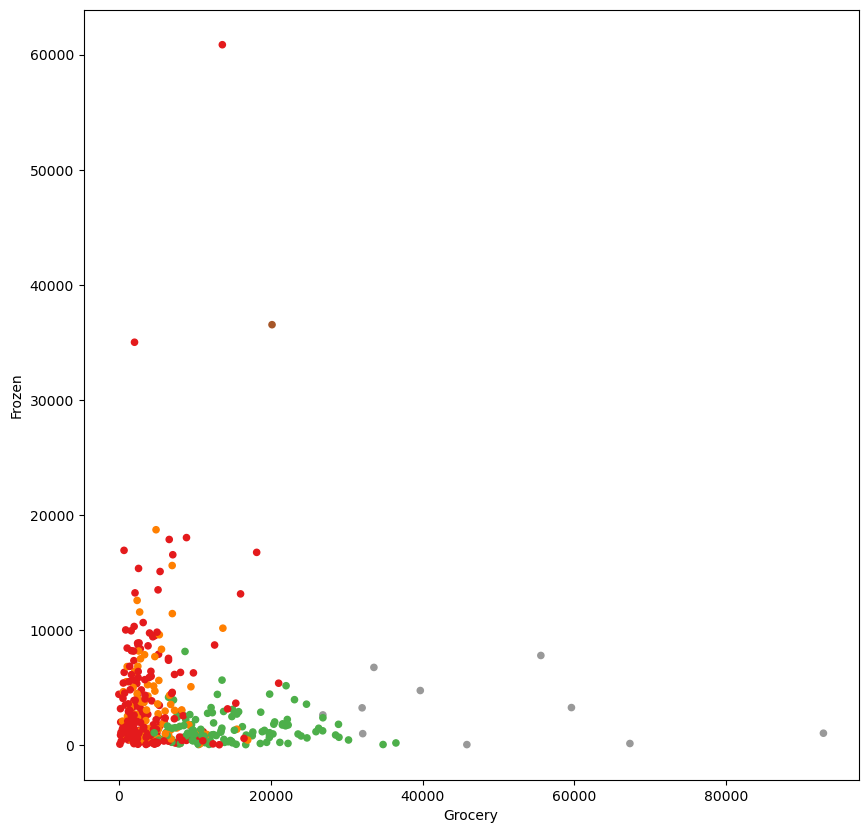

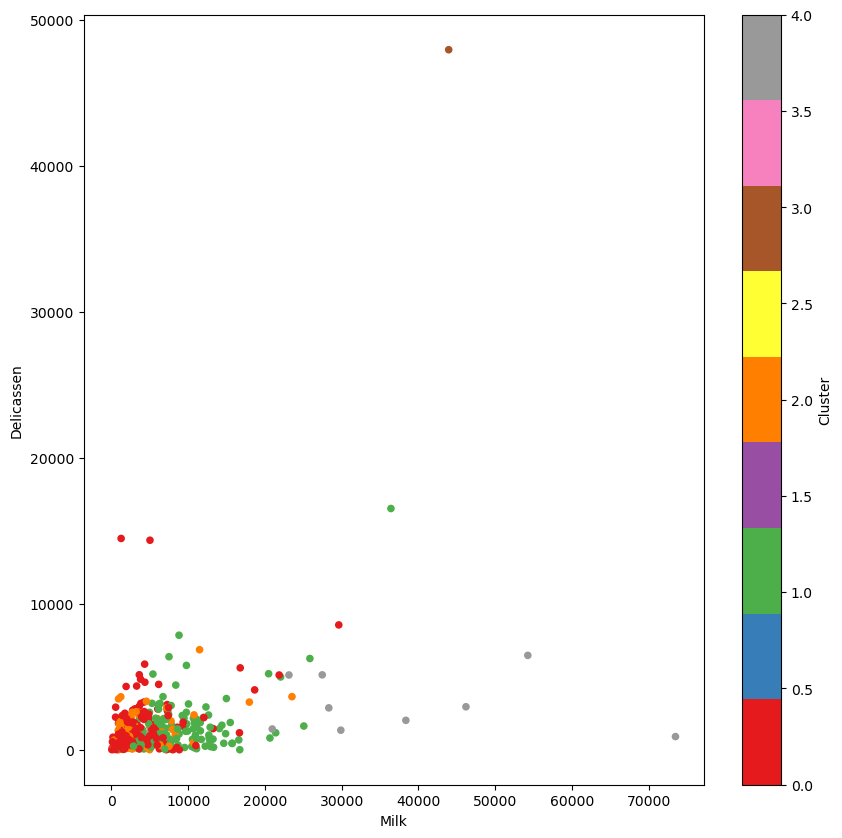

In [10]:
df.plot(kind = 'scatter',x='Grocery', y= 'Frozen', c='Cluster', cmap = 'Set1', colorbar=False, figsize=(10,10))
df.plot(kind = 'scatter',x='Milk',y='Delicassen', c='Cluster', cmap = 'Set1', colorbar=True, figsize=(10,10))

plt.show()
plt.close()

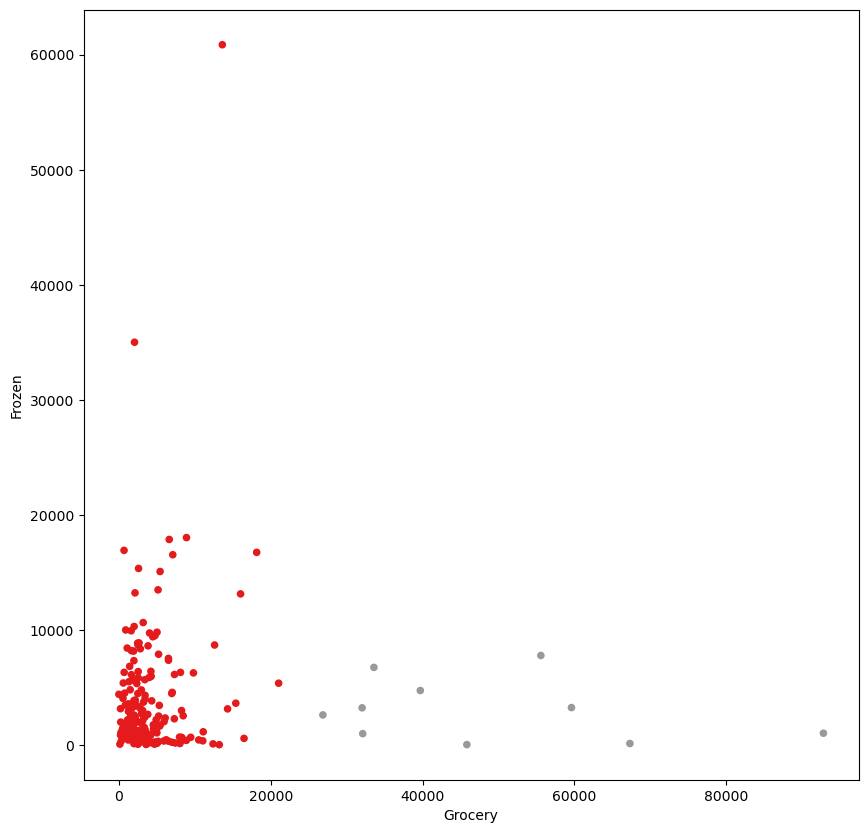

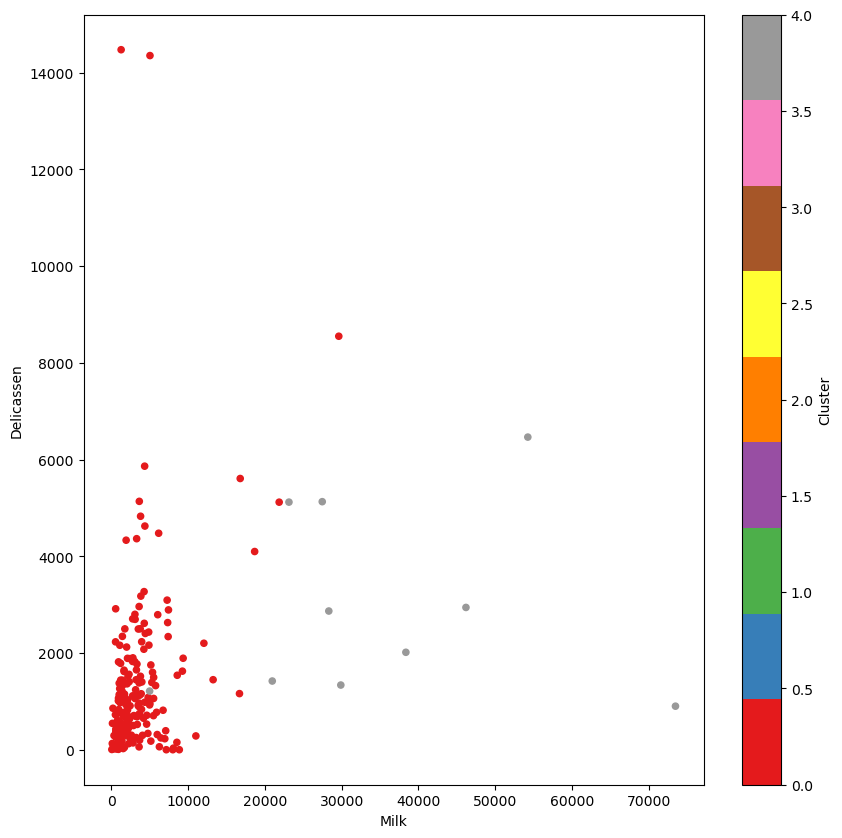

In [11]:
mask = (df['Cluster']==0)|(df['Cluster']==4)
ndf=df[mask]

ndf.plot(kind = 'scatter', x='Grocery', y='Frozen', c='Cluster', cmap = 'Set1', colorbar=False, figsize=(10,10))
ndf.plot(kind = 'scatter', x='Milk', y='Delicassen',c='Cluster', cmap='Set1', colorbar=True, figsize=(10,10))

plt.show()
plt.close()

## 4-2 DBSCAN

__DBSCAN__은 데이터가 위치하고 있는 공간 밀집도를 기준으로 클러스터를 구분한다. 자기를 중심으로 반지름 R의 공간에 최소 M개의 포인트가 존재하는 점을 코어 포인트라고 한다. 코어 포인트는 아니지만 반지름 R 안에 다른 코어 포인트가 있을 경우에는 경계 포인트라고 한다. 코어 포인트도 아니고 경계 포인트에도 속하지 않는 점을 Noise 라고 한다.

하나의 클러스터는 반지름 R 안에 서로 위치하는 모든 코어 포인트를 포함하는 방식으로 구성된다. 당연히 각 코어 포인트 주위에 있는 경계 포인트를 포함한다. 당연히 각 코어 포인트 주위에 있는 경계 포인트를 포함한다. 서로 밀접한 데이터끼리 하나의 클러스터를 구성하게 되고 어느 클러스터에도 속하지 않는 점들은 Noise로 남게 된다.

In [1]:
!pip install folium

In [2]:
import pandas as pd
import folium

file_path = '2016_middle_shcool_graduates_report.xlsx'
df = pd.read_excel(file_path, header=0, engine = 'openpyxl')

pd.set_option('display.width', None)
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.unicode.east_asian_width', True)

print(df.columns.values)

['Unnamed: 0' '지역' '학교명' '코드' '유형' '주야' '남학생수' '여학생수' '일반고' '특성화고' '과학고'
 '외고_국제고' '예고_체고' '마이스터고' '자사고' '자공고' '기타진학' '취업' '미상' '위도' '경도']


In [3]:
print(df.head())
print()
print(df.info())
print()

print(df.describe())

   Unnamed: 0    지역                               학교명  코드  유형  ...  \
0           0  성북구  서울대학교사범대학부설중학교.....       3  국립  ...   
1           1  종로구  서울대학교사범대학부설여자중학교...     3  국립  ...   
2           2  강남구           개원중학교                     3  공립  ...   
3           3  강남구           개포중학교                     3  공립  ...   
4           4  서초구           경원중학교                     3  공립  ...   

  기타진학  취업   미상       위도        경도  
0    0.004     0  0.000  37.594942  127.038909  
1    0.031     0  0.000  37.577473  127.003857  
2    0.009     0  0.003  37.491637  127.071744  
3    0.019     0  0.000  37.480439  127.062201  
4    0.010     0  0.000  37.510750  127.008900  

[5 rows x 21 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  415 non-null    int64  
 1   지역          415 non-null    object 
 2   학교명         415 non-null

In [7]:
mschool_map = folium.Map(location = [37.55,126.98], tiles ='Stamen Terrain', zoom_start=12)

for name, lat, lng in zip(df.학교명, df.위도, df.경도):
    folium.CircleMarker([lat,lng], radius=5, color='brown',fill=True, fill_color='coral'
                        ,fill_opacity = 0.7, popup=name).add_to(mschool_map)
mschool_map.save("seoul_mschool_location.html")

In [10]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()

onehot_location = label_encoder.fit_transform(df['지역'])
onehot_code = label_encoder.fit_transform(df['코드'])
onehot_type = label_encoder.fit_transform(df['유형'])
onehot_day = label_encoder.fit_transform(df['주야'])

df['location'] = onehot_location
df['code'] = onehot_code
df['type'] = onehot_type
df['day'] = onehot_day

display(df.head())

,Unnamed: 0,지역,학교명,코드,유형,...,경도,location,code,type,day
0,0,성북구,서울대학교사범대학부설중학교...,3,국립,...,127.038909,16,0,1,0
1,1,종로구,서울대학교사범대학부설여자중학교...,3,국립,...,127.003857,22,0,1,0
2,2,강남구,개원중학교,3,공립,...,127.071744,0,0,0,0
3,3,강남구,개포중학교,3,공립,...,127.062201,0,0,0,0
4,4,서초구,경원중학교,3,공립,...,127.008900,14,0,0,0


In [11]:
from sklearn import cluster

columns_list = [9,10,13]
X=df.iloc[:, columns_list]
print(X[:5])
print()


X= preprocessing.StandardScaler().fit(X).transform(X)

dbm = cluster.DBSCAN(eps = 0.2, min_samples=5)

dbm.fit(X)

cluster_label = dbm.labels_
print(cluster_label)
print()

   특성화고  과학고  마이스터고
0     0.148   0.018       0.011
1     0.199   0.000       0.000
2     0.047   0.009       0.006
3     0.097   0.013       0.019
4     0.017   0.007       0.000

[-1  0 -1 -1  1  5 -1 -1  2 -1 -1 -1  2  0 -1 -1 -1 -1 -1  2 -1 -1 -1  0
  1  2 -1  1  0  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  3
 -1 -1 -1  3 -1  1 -1 -1  4 -1 -1  4 -1 -1  4  0 -1  5  0  6  1 -1  0  1
 -1  0  8 -1 -1 -1  4 -1  3 -1 -1  3  4 -1 -1 -1  3 -1  0  2 -1  0 -1 -1
  5  0  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  0 -1
 -1 -1  5  8  0 -1 -1 -1 -1 -1  7  3  0 -1  5  0  4 -1  5 -1 -1 -1 -1 -1
 -1  6 -1 -1 -1  8  4 -1 -1  6 -1 -1 -1 -1 -1  0  6 -1 -1 -1 -1 -1 -1  6
 -1 -1  7 -1 -1  6 -1  0  0 -1  3 -1  6  8 -1  6 -1 -1 -1 -1 -1 -1  5  0
  0 -1 -1 -1 -1  0  0 -1  0 -1 -1  6  0 -1 -1 -1 -1 -1  4 -1 -1  3 -1 -1
  0 -1 -1  9 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1  9  0
  9 -1 -1 -1 -1  5  0 -1 -1 -1  0  0 -1  0 -1 -1 -1 -1 -1  0  4 -1 -1  0
 -1 -1  0  0 -1 

In [13]:
df['cluster'] = cluster_label
display(df.head())

,Unnamed: 0,지역,학교명,코드,유형,...,location,code,type,day,cluster
0,0,성북구,서울대학교사범대학부설중학교...,3,국립,...,16,0,1,0,-1
1,1,종로구,서울대학교사범대학부설여자중학교...,3,국립,...,22,0,1,0,0
2,2,강남구,개원중학교,3,공립,...,0,0,0,0,-1
3,3,강남구,개포중학교,3,공립,...,0,0,0,0,-1
4,4,서초구,경원중학교,3,공립,...,14,0,0,0,1
